In [17]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from scipy.fft import rfft,fft, ifft, fftshift, fftfreq
from PlotOpti import plot_optimization_results

In [24]:
data_path = 'Plot/resultats_multi_dt_lin2025-05-16 10:32:13.210815.npz'
data = np.load(data_path, allow_pickle=True)

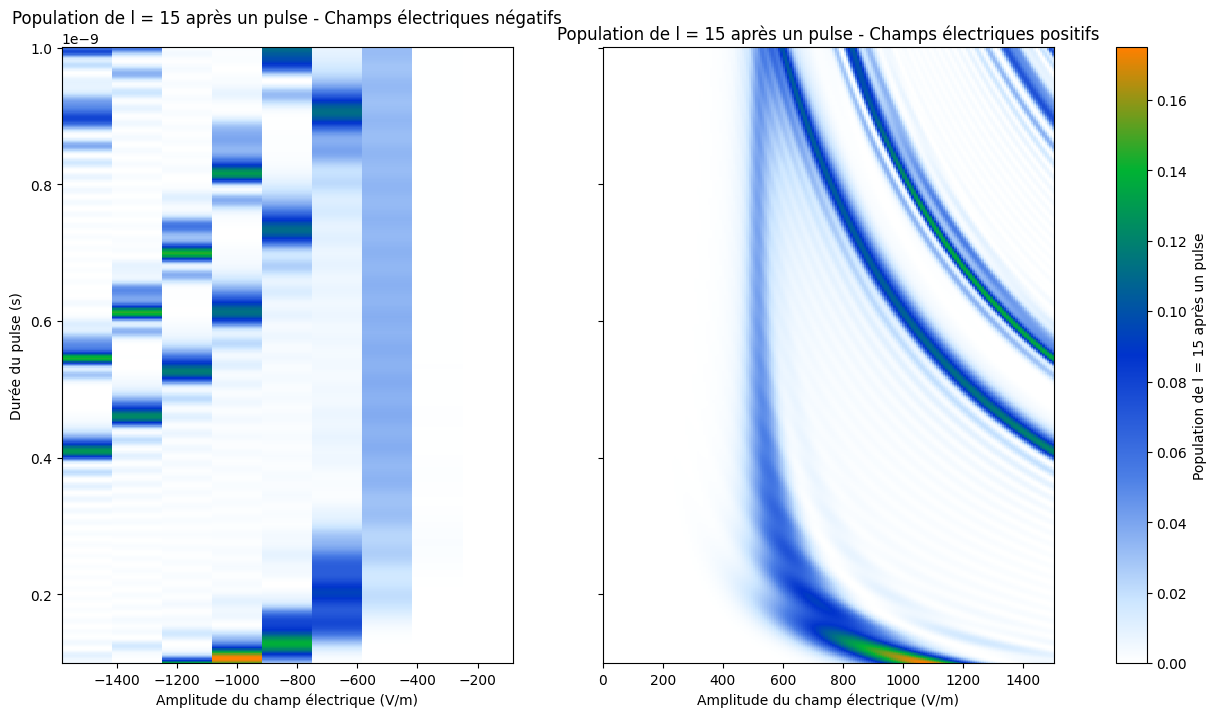


Analyse statistique des populations:
Population de l = 15 après un pulse moyenne: 0.013
Population de l = 15 après un pulse maximale: 0.175

Paramètres optimaux pour la Population de l = 15 après un pulse maximale:
  - Durée: 1.00e-10 s
  - Champ électrique: 1070.35 V/m
  - Population de l = 15 après un pulse: 0.175


(<Figure size 1600x800 with 3 Axes>,
 (<Axes: title={'center': 'Population de l = 15 après un pulse - Champs électriques négatifs'}, xlabel='Amplitude du champ électrique (V/m)', ylabel='Durée du pulse (s)'>,
  <Axes: title={'center': 'Population de l = 15 après un pulse - Champs électriques positifs'}, xlabel='Amplitude du champ électrique (V/m)'>))

In [59]:

#print(data['dt_values'])
dt_values = data['dt_values']
#print('dt',type(dt_values))
amplitudes = data['amplitudes']
#l_sup_10_pop = data['l_sup_10_pop'].item()
#10_pop = data['l10_pop'].item()
#l11_pop = data['l11_pop'].item()
#l3_pop = data['l3_pop'].item()
l15_pop = data['l15_pop'].item()
plot_optimization_results(data_path, 'l15_pop',title_prefix='Population de l = 15 après un pulse')


In [63]:
period = 0
vitesse_angulaire = -2.748595637603823889e+03
period = 2 * np.pi / vitesse_angulaire

NpzFile 'Plot/resultats_multi_dt_lin2025-05-16 10:32:13.210815.npz' with keys: dt_values, amplitudes, l0_pop, l1_pop, l2_pop...
len= 500


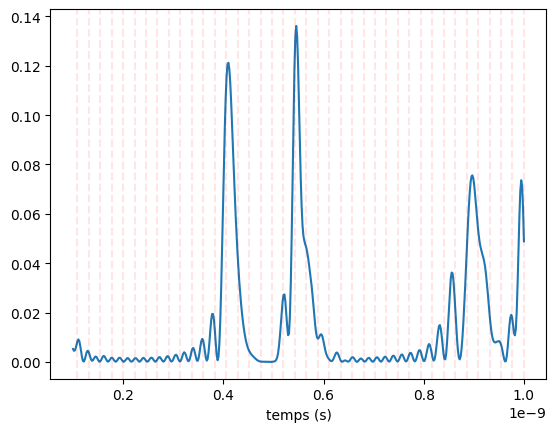

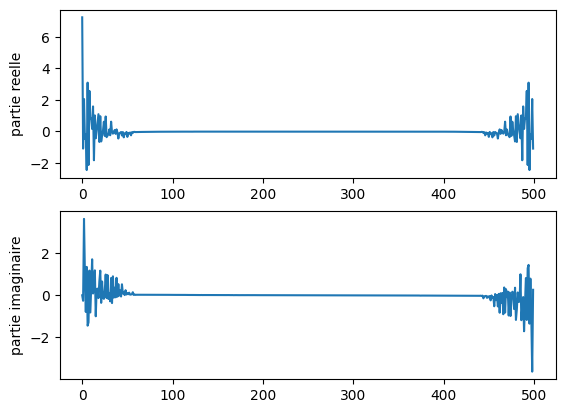

In [140]:
EF_idx = 0
# 2. aller chercher toutes les valeurs à chaque temps pour ce champ electrique
sup = np.zeros(len(dt_values))
pop = np.zeros(len(dt_values))
for i in range(len(dt_values)):
    #sup[i] = l_sup_10_pop[dt_values[i]][EF_idx]
    pop[i] = l15_pop[dt_values[i]][EF_idx]
print(data)
plt.plot(dt_values, pop)
for i in range(40):
    plt.axvline(i*period*1e-8+1e-9, color='r', linestyle='--',alpha=0.1)
plt.xlabel('temps (s)')
print('len=',len(pop))
# TDF dessus
L_SUP = fft(sup)
POP = fft(pop)

RPOP = rfft(pop)
plt.figure()
plt.subplot(211)
plt.plot(np.real(POP))
plt.ylabel("partie reelle")
#plt.xlim(0,50)
plt.subplot(212)
plt.plot(np.imag(POP))
plt.ylabel("partie imaginaire")
#plt.xlim(0,50)
plt.show()


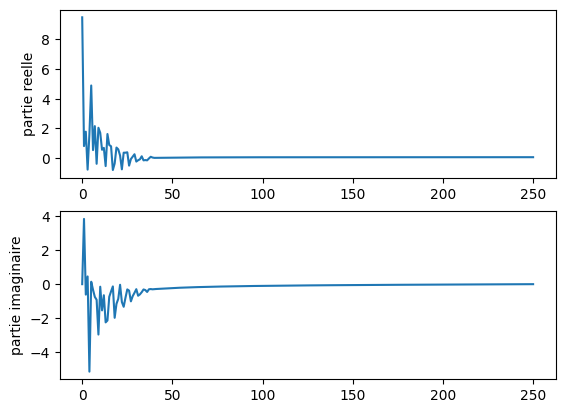

In [84]:
RPOP = rfft(pop)
plt.figure()
plt.subplot(211)
plt.plot(np.real(RPOP))
plt.ylabel("partie reelle")
plt.subplot(212)
plt.plot(np.imag(RPOP))
plt.ylabel("partie imaginaire")

plt.show()

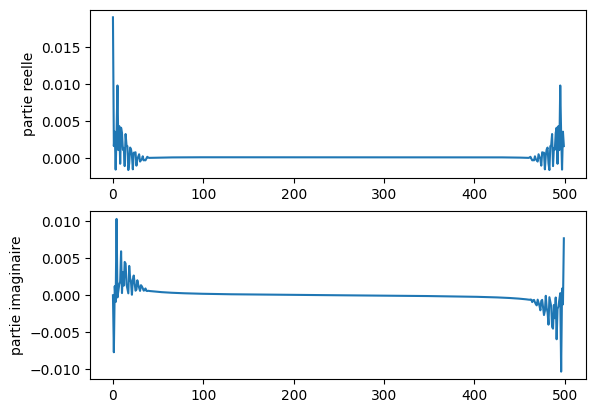

In [85]:
IPOP = ifft(pop)
plt.figure()
plt.subplot(211)
plt.plot(np.real(IPOP))
plt.ylabel("partie reelle")
plt.subplot(212)
plt.plot(np.imag(IPOP))
plt.ylabel("partie imaginaire")
plt.show()

NpzFile 'Plot/resultats_multi_dt_lin2025-05-16 10:32:13.210815.npz' with keys: dt_values, amplitudes, l0_pop, l1_pop, l2_pop...
len= 500
[-1.09755662-2.61188607e-01j  2.04643017+3.63431562e+00j
 -0.4730409 +1.04574236e+00j -0.17898167-7.92530070e-01j
 -2.45838428+1.35053262e+00j  3.08449378-1.44538876e+00j
 -2.1392895 -1.28710438e+00j  2.55942973+1.17426593e+00j
  0.8180977 -8.17942386e-01j  0.79738416+4.78647014e-01j
  0.14801057+1.71237046e+00j  1.57663496+8.43973536e-02j
 -1.83755526+5.57906292e-01j  1.00550432+1.18602006e+00j
 -0.4444743 -9.99325660e-01j -0.01001763+2.99084114e-01j
  0.52910355+3.15844414e-01j  1.08459493-1.34329864e-01j
 -0.67734107+6.66147782e-01j  0.95496196+1.17280847e+00j
 -0.64539357-3.60367499e-01j -0.25911077+6.55829832e-01j
  0.03949356-1.19963758e-01j  0.60576186-1.70286663e-01j
 -0.29438512+2.17448814e-01j  0.93800473+9.86755638e-01j
 -0.37342132-1.31604063e-01j -0.28019158+9.62881573e-01j
 -0.1911657 -1.75111730e-01j  0.11513057+8.96839539e-02j
 -0.2512

/Users/sam/.pyenv/versions/3.10.15/lib/python3.10/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/sam/.pyenv/versions/3.10.15/lib/python3.10/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


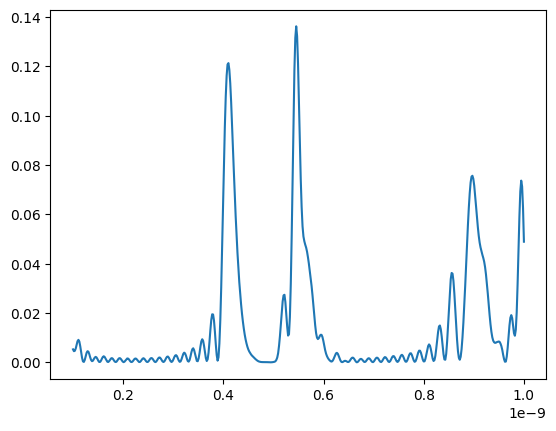

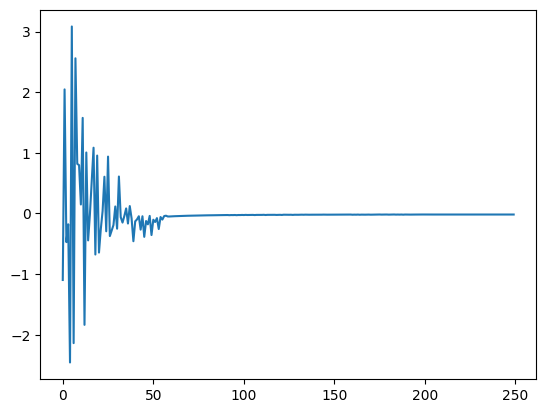

In [145]:
EF_idx = 0
l3_pop = data['l3_pop'].item()
# 2. aller chercher toutes les valeurs à chaque temps pour ce champ electrique
sup = np.zeros(len(dt_values))
pop = np.zeros(len(dt_values))
for i in range(len(dt_values)):
    #sup[i] = l_sup_10_pop[dt_values[i]][EF_idx]
    pop[i] = l15_pop[dt_values[i]][EF_idx]
print(data)
plt.plot(dt_values, pop)
print('len=',len(pop))
# TDF dessus
L_SUP = fft(sup)
POP = rfft(pop)
POP = POP[1:]
print(POP)
print('len=',len(pop)/2)
plt.figure()
plt.plot(POP)
plt.show()


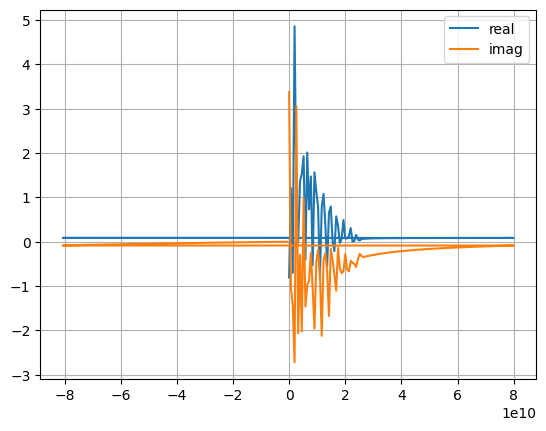

In [126]:
dt_signal = 0.062e-10
n = len(POP)
FREQ_POP = fftfreq(n,dt_signal)
plt.plot(FREQ_POP,POP.real, label = "real")
plt.plot(FREQ_POP,POP.imag, label = "imag")
plt.legend()
plt.grid()
#plt.xlim(-4,4)
plt.show()

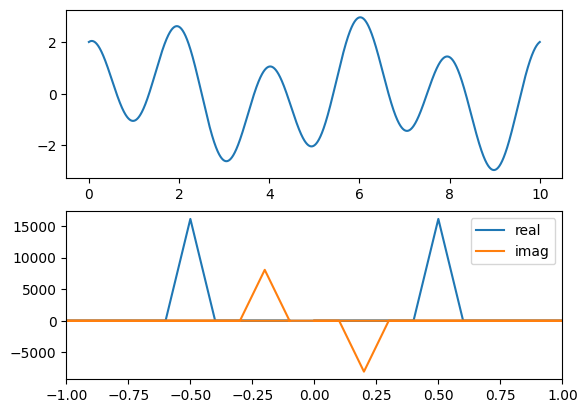

In [10]:
# definition du signal
dt = 0.62e-3
T1 = 2
T2 = 5
t = np.arange(0, T1*T2, dt)
signal = 2*np.cos(2*np.pi/T1*t) + np.sin(2*np.pi/T2*t)

# affichage du signal
plt.subplot(211)
plt.plot(t,signal)

# calcul de la transformee de Fourier et des frequences
fourier = np.fft.fft(signal)
n = signal.size
freq = np.fft.fftfreq(n, d=dt)

# affichage de la transformee de Fourier
plt.subplot(212)
plt.plot(freq, fourier.real, label="real")
plt.plot(freq, fourier.imag, label="imag")
plt.legend()
plt.xlim(-1,1)

plt.show()

In [127]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.optimize import minimize

# Supposons que nous avons un signal résultant d'une convolution
# Dans un cas réel, ce serait votre signal mesuré
def generate_example_data(n=100):
    # Créons deux signaux de test
    t = np.linspace(0, 1, n)
    signal1 = np.sin(2 * np.pi * 5 * t)  # Signal sinusoïdal
    signal2 = np.exp(-10 * (t - 0.5)**2)  # Gaussienne
    
    # Leur convolution
    convolved_signal = np.convolve(signal1, signal2, mode='same')
    
    return signal1, signal2, convolved_signal, t

# Fonction objectif pour l'optimisation
def objective_function(params, observed_signal, n):
    # Reconstruction des deux signaux à partir des paramètres
    half_n = len(params) // 2
    signal1_est = params[:half_n]
    signal2_est = params[half_n:]
    
    # Calculer la convolution des signaux estimés
    conv_est = np.convolve(signal1_est, signal2_est, mode='same')
    
    # Erreur quadratique moyenne
    error = np.sum((conv_est - observed_signal)**2)
    
    return error

# Fonction pour décomposer un signal en deux par optimisation
def blind_deconvolution(observed_signal, n_iter=1000):
    n = len(observed_signal)
    
    # Initialisation aléatoire des signaux
    np.random.seed(42)  # Pour la reproductibilité
    initial_guess = np.random.rand(2 * n)
    
    # Optimisation
    result = minimize(
        objective_function, 
        initial_guess, 
        args=(observed_signal, n),
        method='L-BFGS-B', 
        options={'maxiter': n_iter}
    )
    
    # Récupération des signaux estimés
    half_n = len(result.x) // 2
    signal1_est = result.x[:half_n]
    signal2_est = result.x[half_n:]
    
    return signal1_est, signal2_est

signal1_est [ 0.03531089  0.39111438  0.2284654   0.26785231 -0.12948201 -0.12571446
 -0.25480607  0.4013282   0.182654    0.29160421 -0.08934457  0.47274722
  0.33181822 -0.2450646  -0.10550945 -0.13125572  0.06382098  0.22856622
  0.19882154 -0.03710628  0.30656679 -0.03002124 -0.23337006  0.02146217
  0.28238006  0.27646646 -0.26546324  0.1551565   0.3146076  -0.11981415
  0.06742071 -0.08531775 -0.11137787  0.32165829  0.39314438  0.36922883
  0.00648248 -0.14158643  0.31371596  0.19853612 -0.15864321  0.09150328
 -0.2071194   0.53982622  0.03676532  0.10133121  0.13456796  0.22147289
  0.12137273 -0.11180626  0.49874076  0.46407386  0.64425427  0.46599814
  0.2698429   0.43522375 -0.17013068 -0.06802066 -0.35426985 -0.07430158
 -0.03818704  0.18308585  0.42925865 -0.07121052 -0.03514366  0.01185164
 -0.09786335  0.28567977  0.0173695   0.71459672  0.35261961 -0.04508893
 -0.0914287   0.23517601  0.47067952  0.25076401  0.36866822  0.06835765
  0.01375222 -0.14882238  0.38711204  0

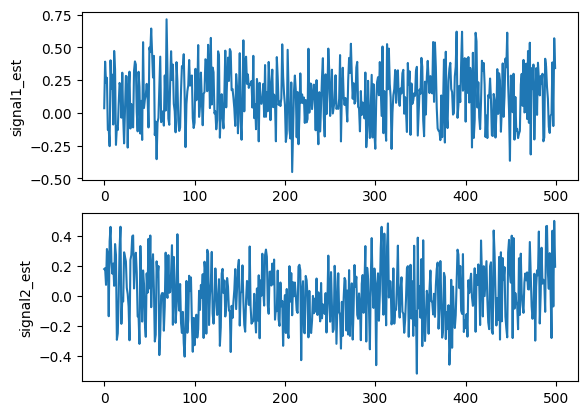

In [ ]:
signal1_est, signal2_est = blind_deconvolution(POP, n_iter=1000)
print('signal1_est',signal1_est)
plt.subplot(211)
plt.plot(signal1_est)
plt.ylabel("signal1_est")
plt.subplot(212)
plt.plot(signal2_est)
plt.ylabel("signal2_est")
plt.show()



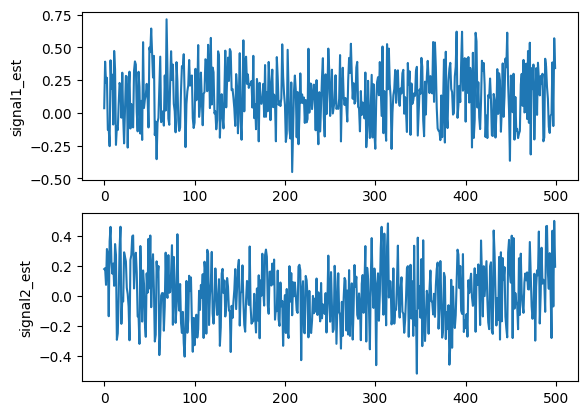

In [ ]:
import scipy.signal as sg
sg.deconvolve(POP,)

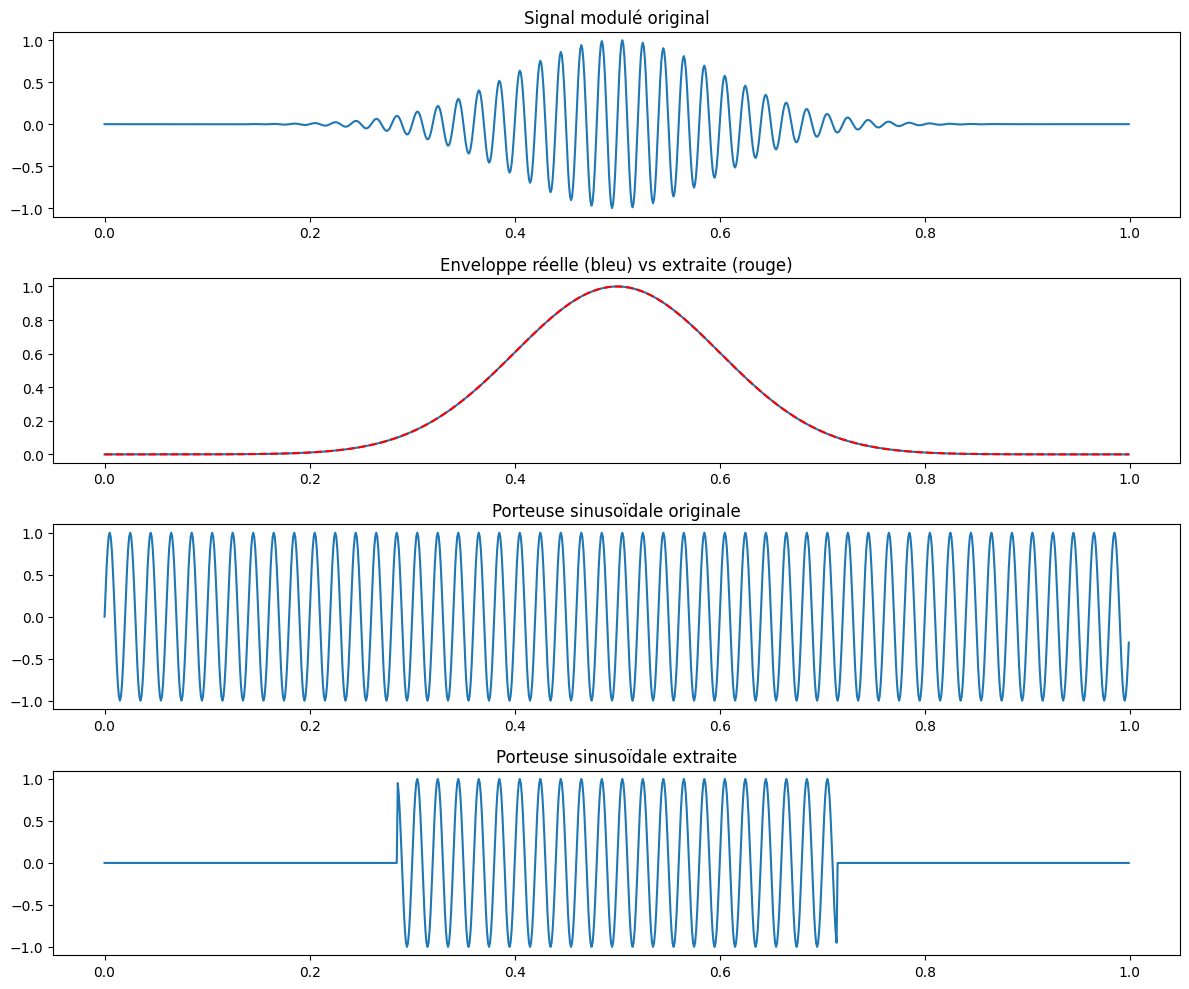

In [142]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

# Création d'un signal d'exemple: sinusoïde modulée en amplitude
fs = 1000  # Fréquence d'échantillonnage
t = np.arange(0, 1, 1/fs)  # Vecteur temps de 1 seconde

# Fonction d'amplitude (enveloppe) - par exemple une gaussienne
amplitude = np.exp(-(t-0.5)**2/(2*0.1**2))

# Sinusoïde porteuse
freq_porteuse = 50  # Hz
porteuse = np.sin(2*np.pi*freq_porteuse*t)

# Signal modulé en amplitude
signal_module = amplitude * porteuse

# Extraction de l'enveloppe avec la transformée de Hilbert
signal_analytique = signal.hilbert(signal_module)
enveloppe_extraite = np.abs(signal_analytique)

# Extraction de la porteuse
porteuse_extraite = signal_module / enveloppe_extraite
# Correction pour éviter les divisions par zéro
porteuse_extraite[enveloppe_extraite < 0.1] = 0

# Visualisation
plt.figure(figsize=(12, 10))

plt.subplot(4, 1, 1)
plt.plot(t, signal_module)
plt.title('Signal modulé original')

plt.subplot(4, 1, 2)
plt.plot(t, amplitude)
plt.plot(t, enveloppe_extraite, 'r--')
plt.title('Enveloppe réelle (bleu) vs extraite (rouge)')

plt.subplot(4, 1, 3)
plt.plot(t, porteuse)
plt.title('Porteuse sinusoïdale originale')

plt.subplot(4, 1, 4)
plt.plot(t, porteuse_extraite)
plt.title('Porteuse sinusoïdale extraite')

plt.tight_layout()
plt.show()

In [144]:
print(POP)

[-1.09755662-2.61188607e-01j  2.04643017+3.63431562e+00j
 -0.4730409 +1.04574236e+00j -0.17898167-7.92530070e-01j
 -2.45838428+1.35053262e+00j  3.08449378-1.44538876e+00j
 -2.1392895 -1.28710438e+00j  2.55942973+1.17426593e+00j
  0.8180977 -8.17942386e-01j  0.79738416+4.78647014e-01j
  0.14801057+1.71237046e+00j  1.57663496+8.43973536e-02j
 -1.83755526+5.57906292e-01j  1.00550432+1.18602006e+00j
 -0.4444743 -9.99325660e-01j -0.01001763+2.99084114e-01j
  0.52910355+3.15844414e-01j  1.08459493-1.34329864e-01j
 -0.67734107+6.66147782e-01j  0.95496196+1.17280847e+00j
 -0.64539357-3.60367499e-01j -0.25911077+6.55829832e-01j
  0.03949356-1.19963758e-01j  0.60576186-1.70286663e-01j
 -0.29438512+2.17448814e-01j  0.93800473+9.86755638e-01j
 -0.37342132-1.31604063e-01j -0.28019158+9.62881573e-01j
 -0.1911657 -1.75111730e-01j  0.11513057+8.96839539e-02j
 -0.25127127-2.88728452e-01j  0.60946652+8.23120818e-01j
 -0.0605863 -3.70741516e-01j -0.1504726 +9.02052772e-01j
 -0.04210014-1.11001297e-01j  0

/Users/sam/.pyenv/versions/3.10.15/lib/python3.10/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/sam/.pyenv/versions/3.10.15/lib/python3.10/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


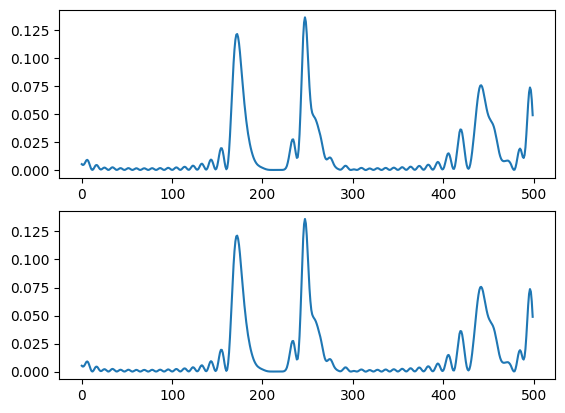

In [154]:
from scipy import signal
signaL = signal.hilbert(pop)
plt.figure()
plt.subplot(211)
plt.plot(signaL)
plt.subplot(212)
plt.plot(pop)
plt.show()

In [156]:
# Filtrage passe-bande pour isoler la porteuse
sos = signal.butter(4, [freq_porteuse-10, freq_porteuse+10], 'bandpass', fs=fs, output='sos')
signal_filtre = signal.sosfilt(sos, pop)

# Détection d'enveloppe simple
enveloppe = np.abs(signal.hilbert(signal_filtre))

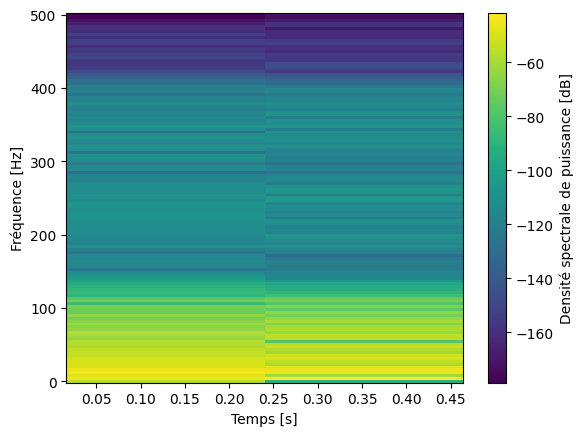

In [159]:
# Analyse par spectrogramme
f, t_spec, Sxx = signal.spectrogram(pop, fs)
plt.pcolormesh(t_spec, f, 10 * np.log10(Sxx))
plt.ylabel('Fréquence [Hz]')
plt.xlabel('Temps [s]')
plt.colorbar(label='Densité spectrale de puissance [dB]')